Visualización de la tendencia de los precios

1- Cargo los df necesarios filtrando columnas innecesarias. Solo necesito, id, fecha, modelo, generacion, memoria  
2- Uno los df necesarios
3- Creo un nuevo df con las medias y desviaciones por modelo y tipo


In [1]:
import os
import pandas as pd
import numpy as np
#import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
carpeta_origen = "../data/5_data_from_comments/"

In [ ]:
def join_and_load_all_csv(folder):
    # Lista para almacenar cada DataFrame
    dfs = []
    # Recorrer los archivos de la carpeta
    for filename in os.listdir(folder):
        print(filename)
        if filename.endswith(".csv"):
            file_path = os.path.join(folder, filename)
            df = pd.read_csv(file_path)
            print(df.shape[0])
            dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.drop('Unnamed: 0', axis=1, inplace=True)
    combined_df['precio'] = combined_df['precio'].replace(',', '.', regex=True).astype(float)
    return combined_df

df = join_and_load_all_csv(carpeta_origen)
df.head(1)

20250106_iphone.csv
1160
20250108_iphone.csv
713
20250113_iphone.csv
1414
20250117_iphone.csv
1266
20250119_iphone.csv
1374


,id,fecha,gen,mod,memoria,bateria,precio,estado,nombre,scrap_locat,dist_scrap_locat,reservado,url,tiene_color,tiene_emojis,tiene_revisado,comentario,tienda,garantia
0,1033637533,20250106,14,basic,128,85.0,615.37,good,apple iphone 14 128gb amarillo - revisado,madrid,60,False,https://es.wallapop.com/item/apple-iphone-14-1...,True,True,True,Marca: Apple\nModelo: iPhone 14\nCapacidad de ...,False,True


In [3]:
df_nondup = df.drop_duplicates(subset=['id'])
df_nondup

df_dup = df[df.duplicated(subset='id', keep=False)]

print("numero de registros:              ", df.shape[0])
print("numero de elementos sin duplicar: ", df_nondup.shape[0])
print("Número de elementos duplicados:   ", df_dup.shape[0])

numero de registros:               5927
numero de elementos sin duplicar:  3099
Número de elementos duplicados:    4359


In [4]:
import pandas as pd

def marcar_vendidos(df, ultima_fecha):
    # Asegurarse de que 'fecha' es tratada como string
    df['fecha'] = df['fecha'].astype(str)

    # Ordenar el DataFrame por 'id' y 'fecha'
    df_sorted = df.sort_values(by=['id', 'fecha'])

    # Añadir la columna 'vendido' con valores por defecto "0"
    df_sorted['vendido'] = "0"

    # Filtrar las filas que no están en la última fecha para evaluación
    for i in range(len(df_sorted) - 1):
        # Si la fecha actual es la última fecha, no evaluamos
        if df_sorted.iloc[i]['fecha'] == ultima_fecha:
            continue

        # Comprobar si el siguiente registro tiene el mismo 'id'
        if df_sorted.iloc[i]['id'] == df_sorted.iloc[i + 1]['id']:
            continue
        else:
            # Si el siguiente registro tiene una fecha diferente y no es la última fecha
            if df_sorted.iloc[i + 1]['fecha'] != ultima_fecha:
                df_sorted.at[df_sorted.index[i], 'vendido'] = "1"

    # Si el último elemento tiene una fecha diferente a la última fecha, marcarlo como vendido
    if df_sorted.iloc[-1]['fecha'] != ultima_fecha:
        df_sorted.at[df_sorted.index[-1], 'vendido'] = "1"

    return df_sorted


df = marcar_vendidos(df, '20250119')


In [5]:
df[['memoria', 'bateria']] = df[['memoria', 'bateria']].fillna(0)


In [6]:
#df = df[['id', 'fecha', 'gen','mod', 'memoria', 'bateria', 'precio']]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, mem):
    # Asegurarse de que 'fecha', 'gen', y 'memoria' sean tratados como categorías
    df['fecha'] = df['fecha'].astype(str)  # Convierte 'fecha' a string
    df['gen'] = df['gen'].astype(str)
    df['memoria'] = df['memoria'].astype(str)

    # Filtrar el DataFrame para incluir solo las filas donde 'memoria' coincide con el argumento 'mem'
    df_filtered = df[df['memoria'] == mem]

    # Crear una nueva columna para agrupar por 'fecha', 'gen' y 'memoria'
    df_filtered['grupo'] = df_filtered['fecha'] + ' ' + df_filtered['gen'] + ' ' + df_filtered['memoria']

    # Ordenar el DataFrame por 'fecha', 'gen' y 'memoria'
    df_filtered = df_filtered.sort_values(by=['gen', 'memoria', 'fecha'])

    # Crear el gráfico de barras con colores por 'gen'
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_filtered, x='grupo', y='precio', hue='gen', palette='Set2')

    # Ajustar etiquetas
    plt.title(f"Precios para {mem} por fecha", fontsize=14)
    plt.xlabel("Fecha y generación", fontsize=12)
    plt.ylabel("Precio", fontsize=12)
    plt.xticks(rotation=90)  # Rotar las etiquetas para que se vean mejor

    # Añadir leyenda
    plt.legend(title="Generación")

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1229469970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + ' ' + df_filtered['gen'] + ' ' + df_filtered['memoria']


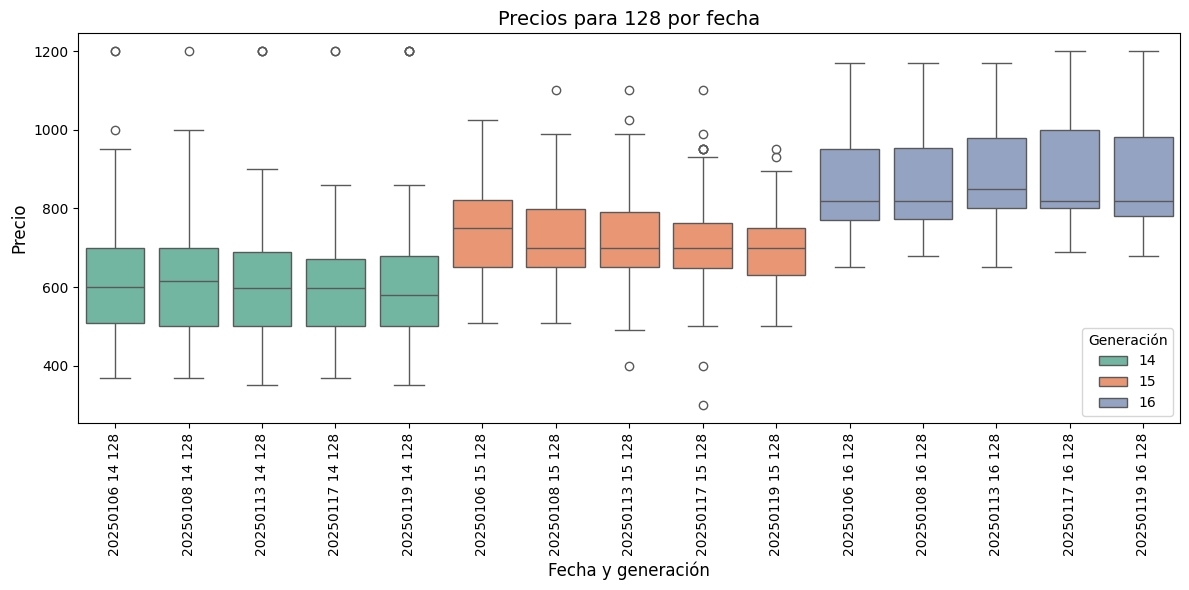

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1229469970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + ' ' + df_filtered['gen'] + ' ' + df_filtered['memoria']


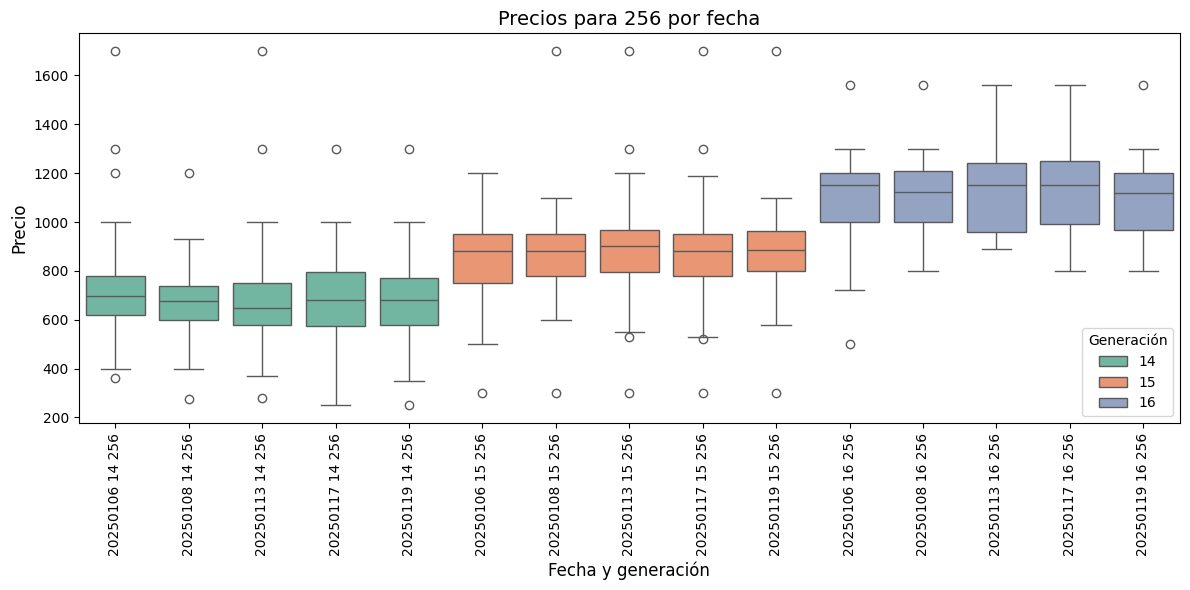

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1229469970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + ' ' + df_filtered['gen'] + ' ' + df_filtered['memoria']


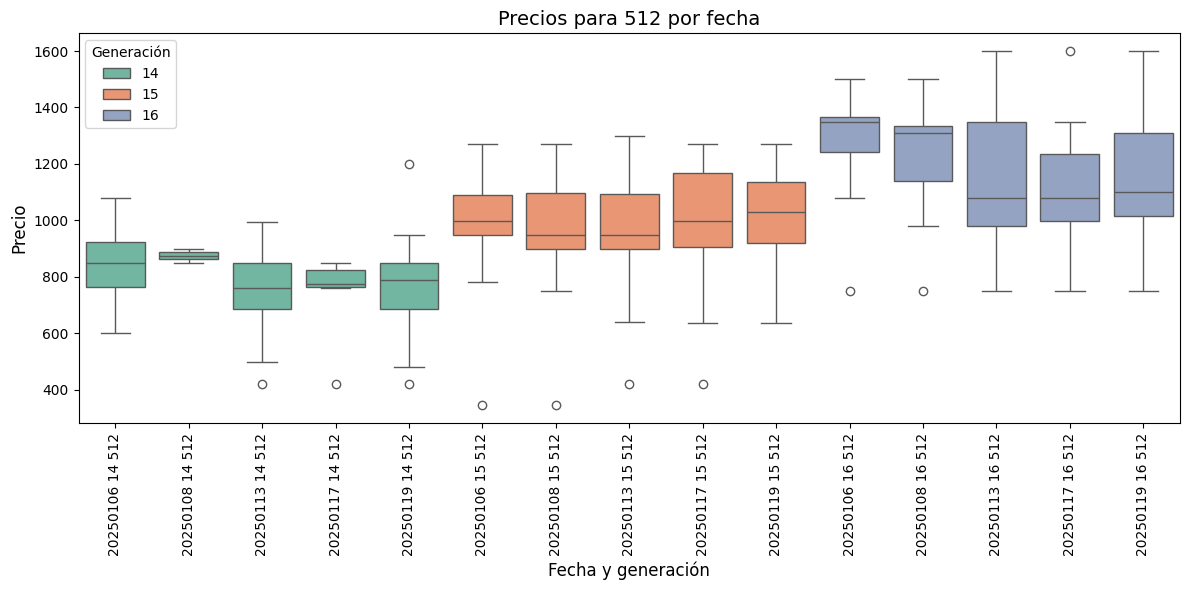

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1229469970.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + ' ' + df_filtered['gen'] + ' ' + df_filtered['memoria']


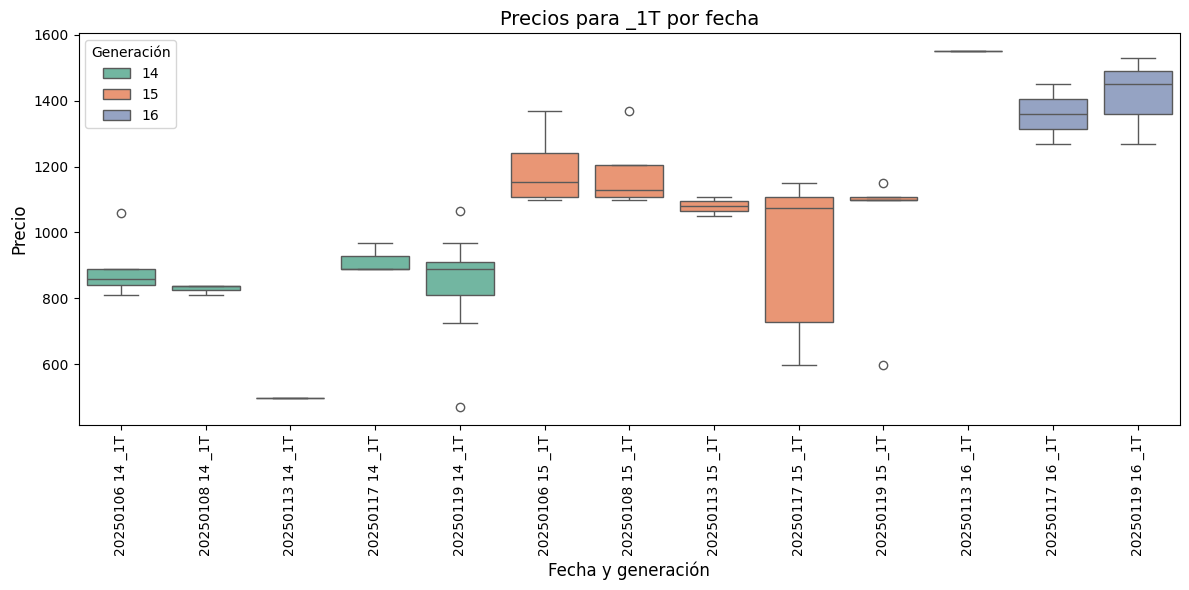

In [8]:
plot_histogram(df, '128')
plot_histogram(df, '256')
plot_histogram(df, '512')
plot_histogram(df, '_1T')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, mem):
    # Asegurarse de que 'fecha', 'gen', 'memoria' y 'vendido' sean tratados como categorías
    df['fecha'] = df['fecha'].astype(str)
    df['gen'] = df['gen'].astype(str)
    df['memoria'] = df['memoria'].astype(str)
    df['vendido'] = df['vendido'].astype(str)  # Asegúrate de que 'vendido' es un string para hue

    # Filtrar el DataFrame para incluir solo las filas donde 'memoria' coincide con el argumento 'mem'
    df_filtered = df[df['memoria'] == mem]

    # Crear una nueva columna para agrupar por 'fecha', 'gen' y 'memoria'
    df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']

    # Ordenar el DataFrame por 'fecha', 'gen' y 'memoria'
    df_filtered = df_filtered.sort_values(by=['gen', 'memoria', 'fecha'])

    # Crear el gráfico de puntos con colores por 'vendido' y formas por 'gen'
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=df_filtered,
        x='grupo',
        y='precio',
        hue='vendido',
        style='gen',
        palette={'1': 'red', '0': 'green'}  # Definir la paleta de colores
    )

    # Ajustar etiquetas
    plt.title(f"Precios para {mem} por fecha", fontsize=14)
    plt.xlabel("Fecha y generación", fontsize=12)
    plt.ylabel("Precio", fontsize=12)
    plt.xticks(rotation=90)  # Rotar las etiquetas para que se vean mejor

    # Añadir leyenda
    plt.legend(title="Estado de Venta")

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1850437359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


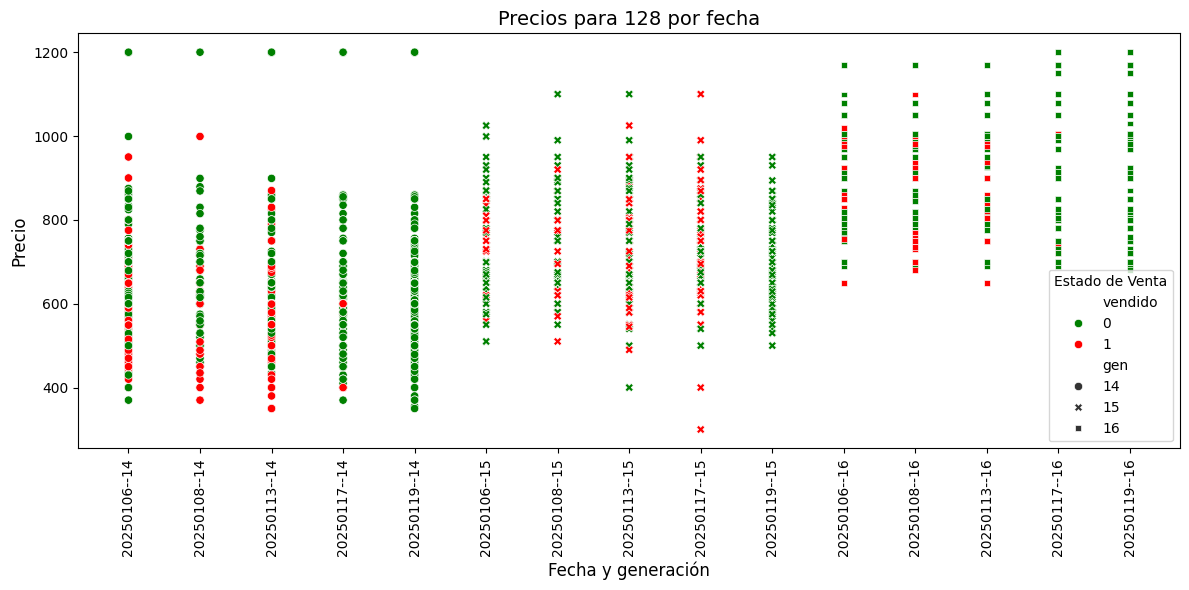

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1850437359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


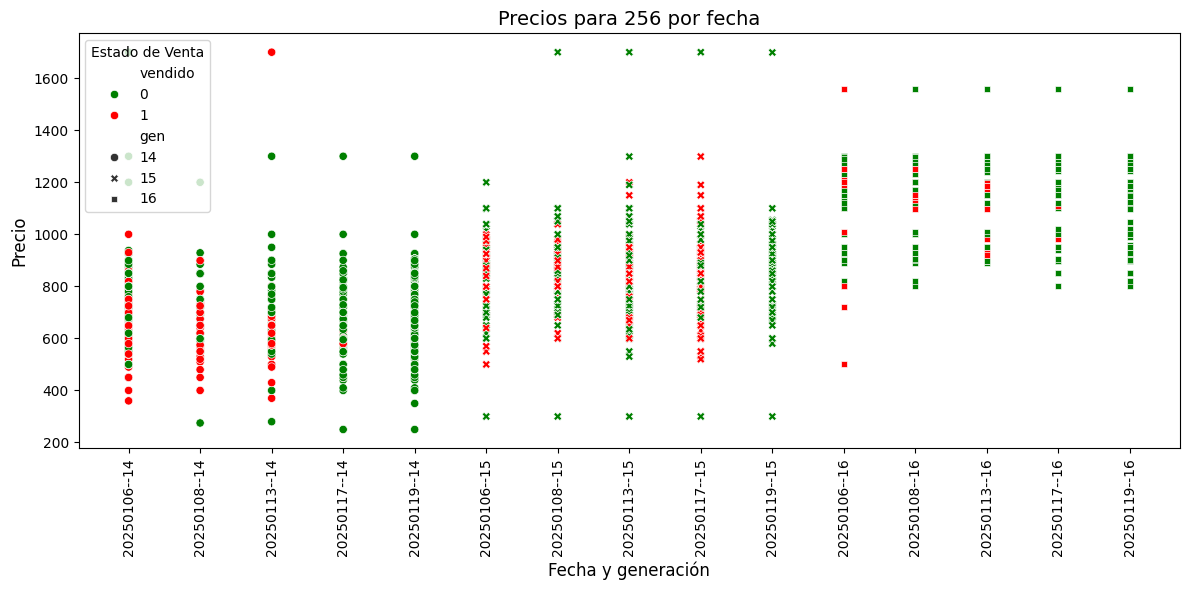

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1850437359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


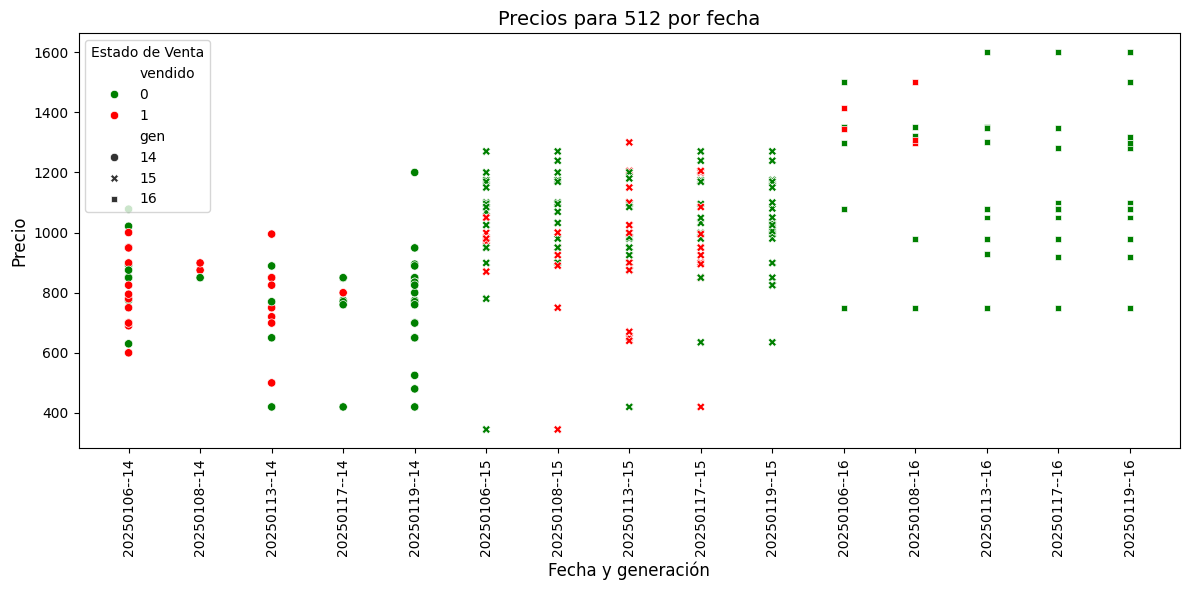

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1850437359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


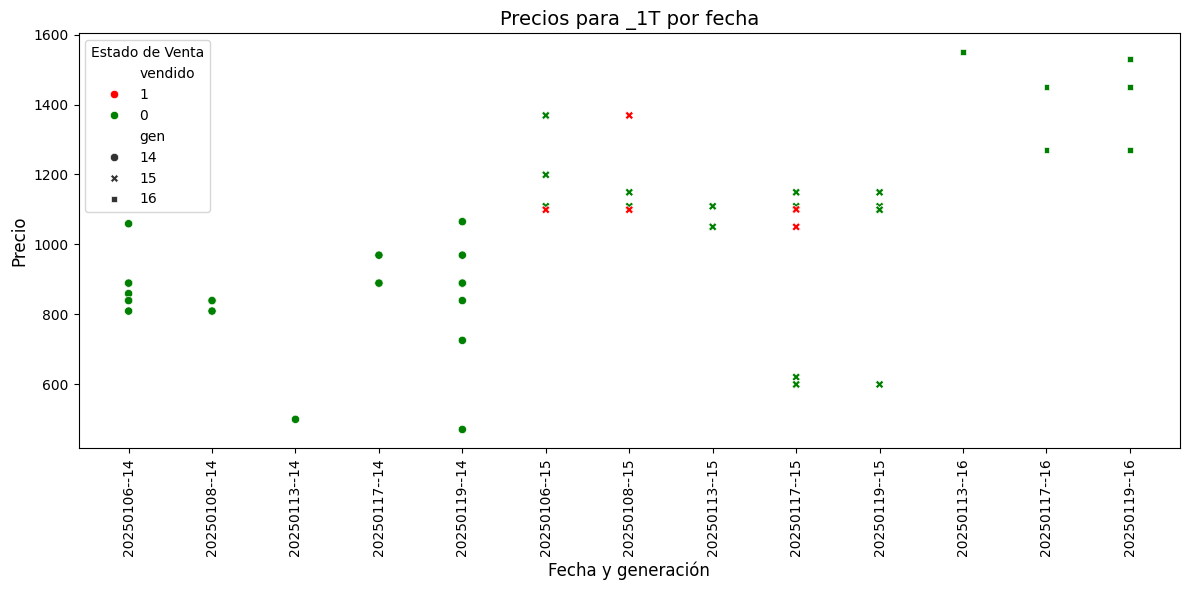

C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\1850437359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


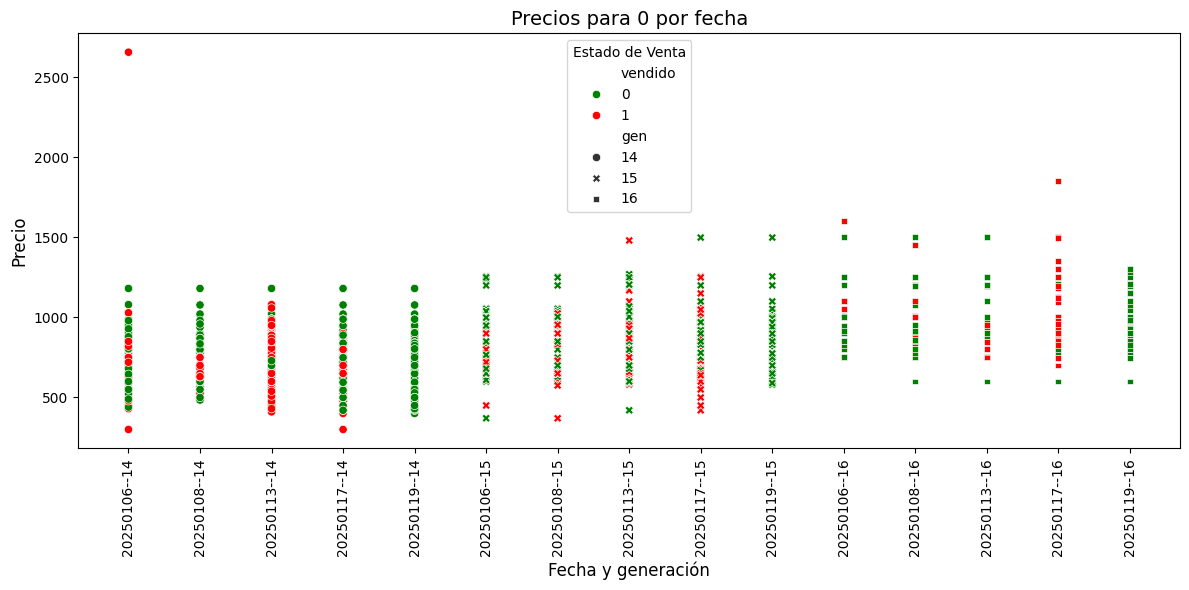

In [10]:
plot_scatter(df, '128')
plot_scatter(df, '256')
plot_scatter(df, '512')
plot_scatter(df, '_1T')
plot_scatter(df, '0')


C:\Users\ACER\AppData\Local\Temp\ipykernel_6264\474663298.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']


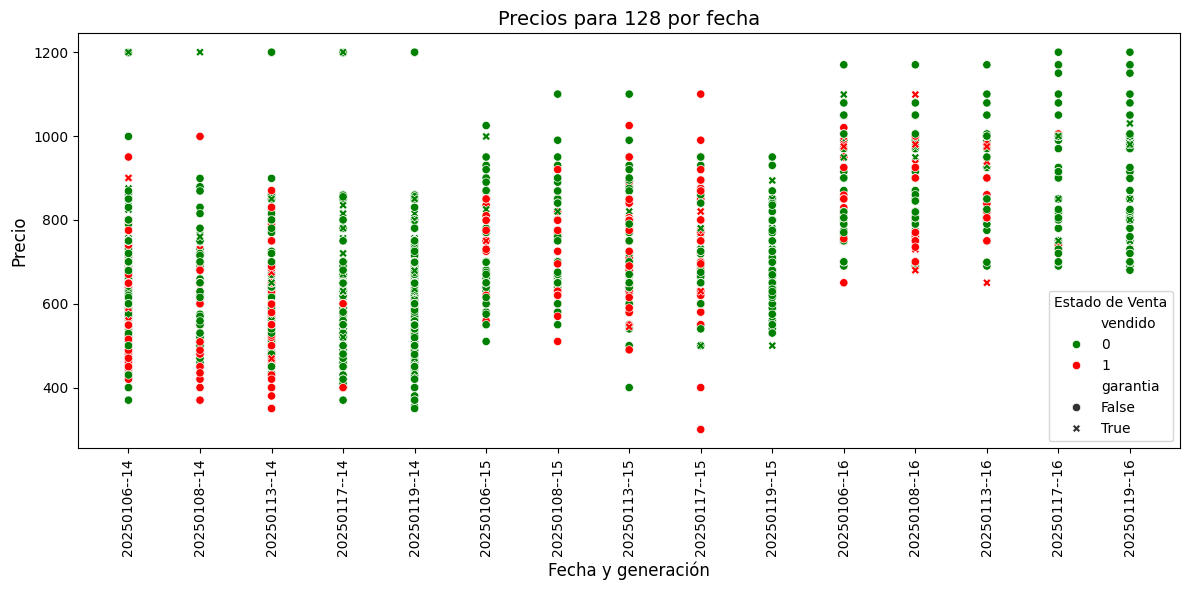

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, mem):
    # Asegurarse de que 'fecha', 'gen', 'memoria' y 'vendido' sean tratados como categorías
    df['fecha'] = df['fecha'].astype(str)
    df['gen'] = df['gen'].astype(str)
    df['memoria'] = df['memoria'].astype(str)
    df['vendido'] = df['vendido'].astype(str)  # Asegúrate de que 'vendido' es un string para hue

    # Filtrar el DataFrame para incluir solo las filas donde 'memoria' coincide con el argumento 'mem'
    df_filtered = df[df['memoria'] == mem]

    # Crear una nueva columna para agrupar por 'fecha' y 'gen'
    df_filtered['grupo'] = df_filtered['fecha'] + '--' + df_filtered['gen']

    # Ordenar el DataFrame por 'fecha', 'gen' y 'memoria'
    df_filtered = df_filtered.sort_values(by=['gen', 'memoria', 'fecha'])

    # Crear el gráfico de puntos con colores por 'vendido' y formas por 'gen'
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=df_filtered,
        x='grupo',
        y='precio',
        hue='vendido',
        style='garantia',
        palette={'1': 'red', '0': 'green'}  # Definir la paleta de colores
    )

    # Ajustar etiquetas
    plt.title(f"Precios para {mem} por fecha", fontsize=14)
    plt.xlabel("Fecha y generación", fontsize=12)
    plt.ylabel("Precio", fontsize=12)
    plt.xticks(rotation=90)  # Rotar las etiquetas para que se vean mejor

    # Añadir leyenda
    plt.legend(title="Estado de Venta")

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

plot_scatter(df, '128')  # Reemplaza '128' con la memoria que desees filtrar